  - 1978년 하버드대학교 도시개발환경학과, 집값에 가장 큰 영향 "깨끗한 공기" 
  - 주어진 환경용인과 집값의 변동을 학습해서 환경용인만 놓고 집값을 예측
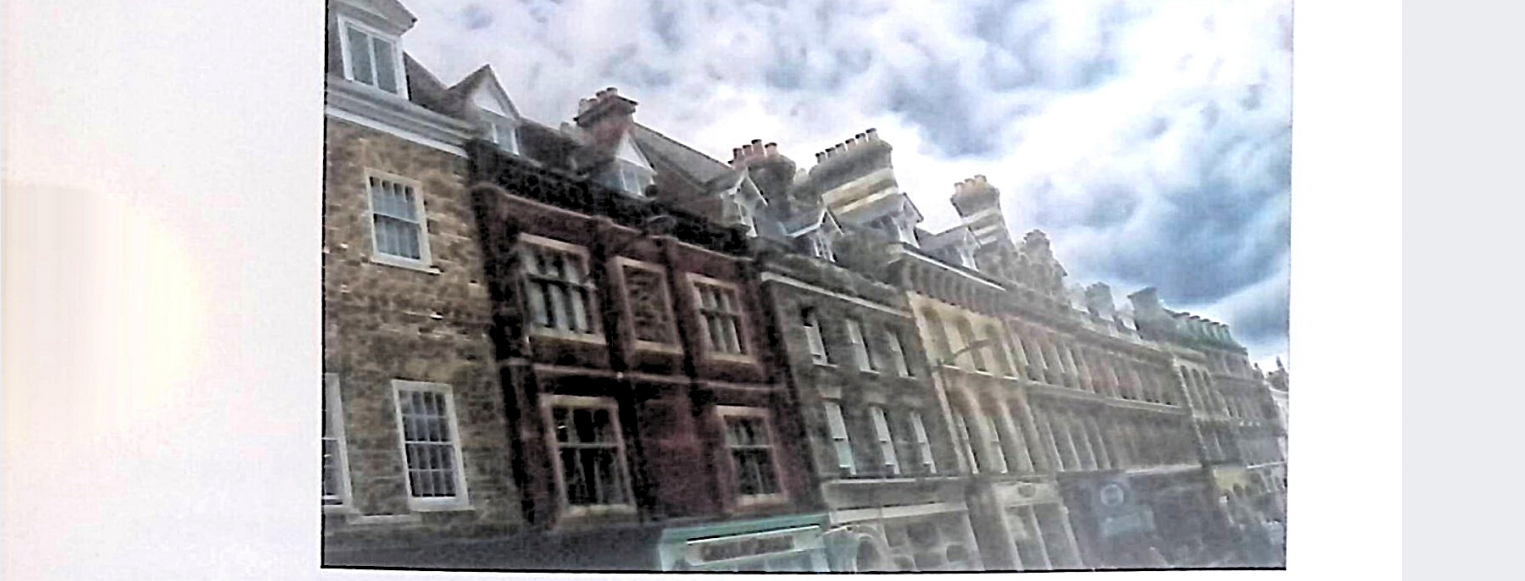

### 1. 데이터 확인하기


In [2]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'housing.csv'

#-*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv(my_data, delim_whitespace=True, header=None)

print(df.info())
#print(df.head())
df.head()

Saving housing.csv to housing (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


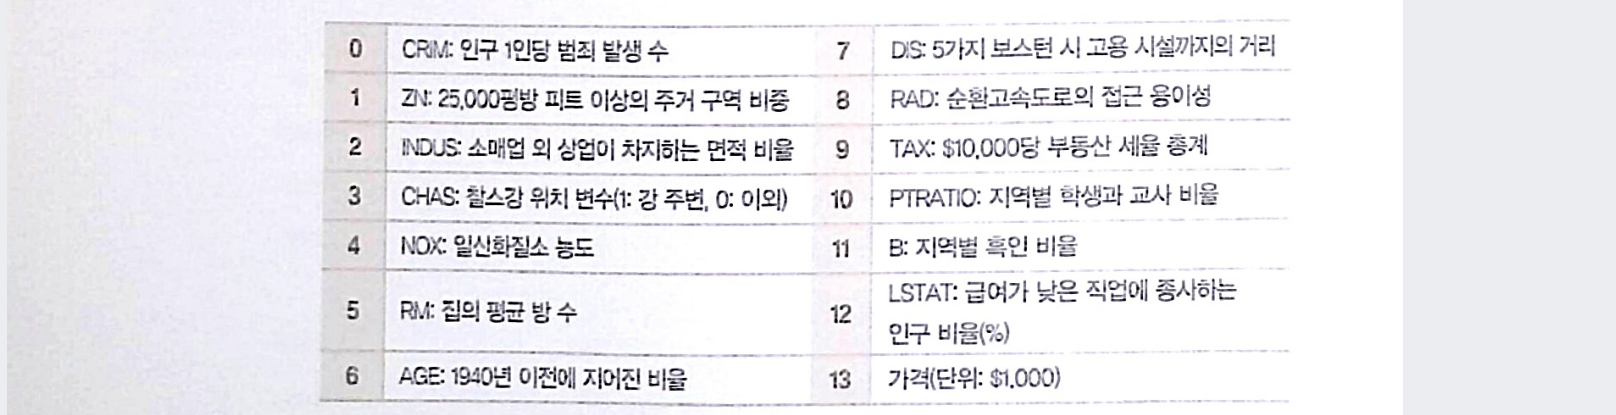

### 2. 선형회귀 실행

In [3]:
# 데이터셋 설정
dataset = df.values
X = dataset[:, :13]
Y = dataset[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# 모델 설정

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

#모델 컴파일
model.compile(loss='mean_squared_error',
              optimizer='adam')
# 모델 실행
model.fit(X_train, Y_train, epochs=200, batch_size=10)




Epoch 1/200
36/36 [==============================] - 1s 1ms/step - loss: 12851.5596
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 1367.1437
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 703.8331
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 632.8430
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 606.3589
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 600.6735
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 599.0093
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 597.8168
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 596.5664
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 595.3091
Epoch 11/200
36/36 [==============================] - 0s 1ms/step - loss: 594.0577
Epoch 12/200
36/36 [==============================] - 0s 1ms/step - loss: 592.8288
Epoch 13/2

  - flatten() 함수
   - 데이터 배열이 몇차원이든 모두 1차원으로 바뀌 읽기 쉽게 해주는 함수
   

In [5]:
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격:{:.3f}, 예상가격:{:.3f}".format(label, prediction))

실제가격:22.600, 예상가격:6.342
실제가격:50.000, 예상가격:6.342
실제가격:23.000, 예상가격:6.342
실제가격:8.300, 예상가격:6.342
실제가격:21.200, 예상가격:6.342
실제가격:19.900, 예상가격:6.342
실제가격:20.600, 예상가격:6.342
실제가격:18.700, 예상가격:6.342
실제가격:16.100, 예상가격:6.342
실제가격:18.600, 예상가격:6.342


### 보스톤집값 예측하기

In [10]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'housing.csv'

#-*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

# seed 값 설정
seed = 3
numpy.random.seed(seed)
tf.random.set_seed(10)

df = pd.read_csv(my_data, delim_whitespace=True, header=None)
'''
print(df.info())
print(df.head())
'''
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam')

model.fit(X_train, Y_train, epochs=200, batch_size=10)

# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))



Saving housing.csv to housing (6).csv
Epoch 1/200
41/41 [==============================] - 0s 1ms/step - loss: 1762.5769
Epoch 2/200
41/41 [==============================] - 0s 1ms/step - loss: 139.7981
Epoch 3/200
41/41 [==============================] - 0s 1ms/step - loss: 103.2481
Epoch 4/200
41/41 [==============================] - 0s 1ms/step - loss: 87.7475
Epoch 5/200
41/41 [==============================] - 0s 1ms/step - loss: 78.9190
Epoch 6/200
41/41 [==============================] - 0s 1ms/step - loss: 74.5485
Epoch 7/200
41/41 [==============================] - 0s 1ms/step - loss: 71.1954
Epoch 8/200
41/41 [==============================] - 0s 1ms/step - loss: 67.0911
Epoch 9/200
41/41 [==============================] - 0s 1ms/step - loss: 64.5527
Epoch 10/200
41/41 [==============================] - 0s 1ms/step - loss: 63.4245
Epoch 11/200
41/41 [==============================] - 0s 1ms/step - loss: 61.5226
Epoch 12/200
41/41 [==============================] - 0s 1ms/step